<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Part 1: Analyzing Wildfire Activities In Australia




# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
    </li>
    <li>
        <a href="#Dataset">Dataset</a>
    </li>
    <li><a href="#Importing Dataset">Importing Dataset</a></li>
    <li><a href="#Tasks">Tasks</a></li>
   


---


# Objectives

The goal is to analyze and visualize patterns and trends in wildfire activity across different regions of Australia using the provided dataset. Specifically, you will:

1. Understand Trends: Examine how wildfire metrics like average estimated fire area change over time or vary by month.
2. Compare Regions: Analyze the distribution of wildfire-related variables, such as estimated fire brightness and pixel counts, across the seven regions.
3. Correlation Analysis: Explore relationships between key variables (e.g., mean radiative power vs. mean confidence level).
4. Geospatial Visualization: Mark and display the regions affected by wildfires on a map of Australia using Folium.


---


# Setup


Use following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `%pip` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
#%pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 folium
# Note: If your environment doesn't support "%pip install", use "!mamba install"

In [2]:
%pip install seaborn
%pip install folium

### Importing Required Libraries




In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

<ipython-input-3-b6dc58e0108d>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


---


# Dataset

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


---


### Importing Data


In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
df = pd.read_csv(text)
print('Data read into a pandas dataframe!')


Data read into a pandas dataframe!


Let's look at some samples rows from the dataset we loaded:


In [5]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


---


Let's verify the column names and the data type of each variable


In [6]:
#Column names
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [7]:
#data type
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns


In [8]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month


**Verify the columns again**


In [9]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

---


## Tasks


### TASK 1.1: Let's try to understand the change in average estimated fire area over time <br>(use pandas to plot)


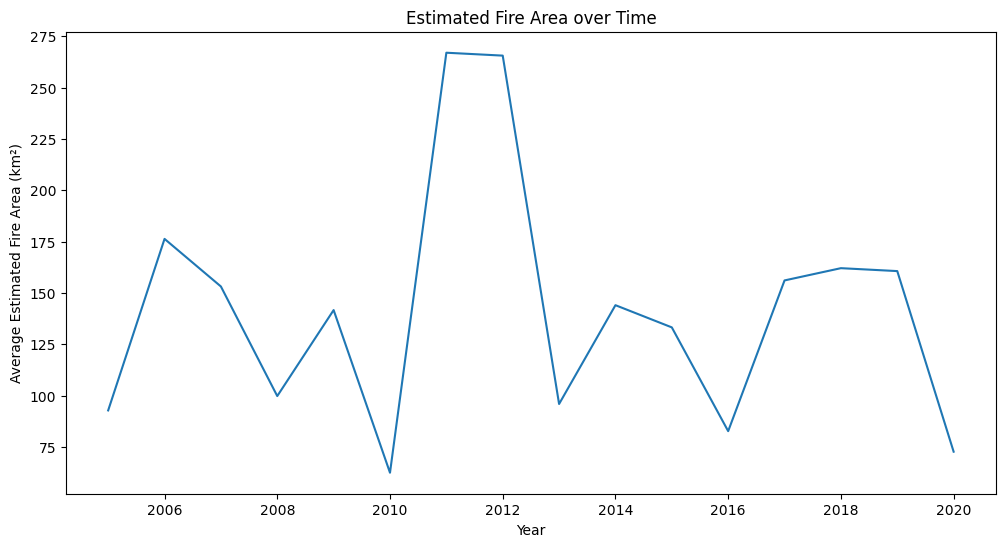

In [10]:
 plt.figure(figsize=(12, 6))
# Grouping the data by 'Year' and calculating the mean of 'Estimated_fire_area'
df_new = df.groupby('Year')['Estimated_fire_area'].mean()
# Plotting the data
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

---


Estimated fire area over time has increased from 2010 to 2012 and it is around 265 kilometer square around that time.

### TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.


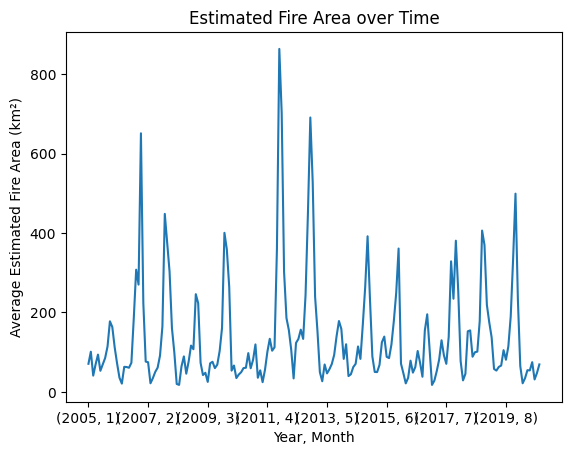

In [11]:
# Grouping the data by both 'Year' and 'Month', and calculating the mean of 'Estimated_fire_area'
df_new = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
# Plotting the data
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

This plot represents that the estimated fire area was on its peak after 2011, April and before 2012. You can verify on google/news, this was the time of maximum wildfire hit in Austrailia


---


### TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions<br> use the functionality of seaborn to develop a barplot


before starting with the plot, why not know the regions mentioned in the dataset?. <br>Make use of unique() to identify the regions in the dataset (apply it on series only)


In [12]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

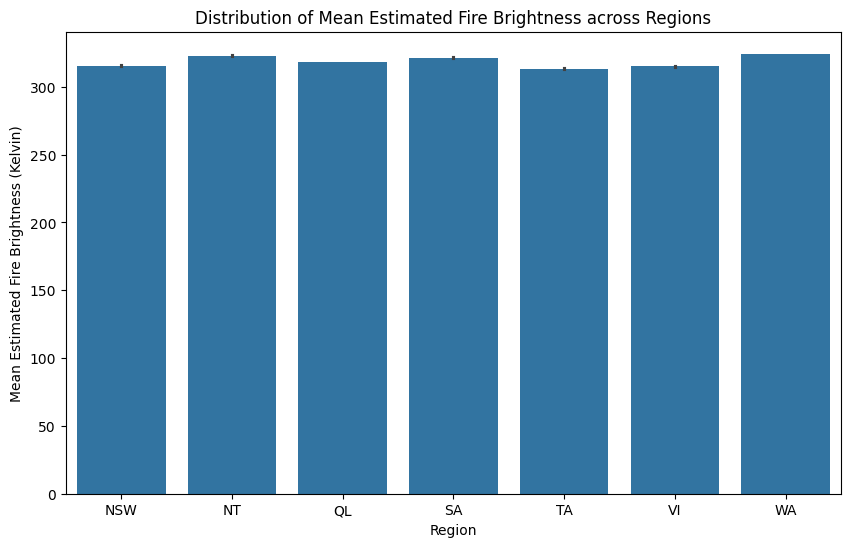

In [13]:
# Creating a bar plot using seaborn to visualize the distribution of mean estimated fire brightness across regions
plt.figure(figsize=(10, 6))
# Using seaborn's barplot function to create the plot
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

---


### TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions<br> we will develop a pie chart for this


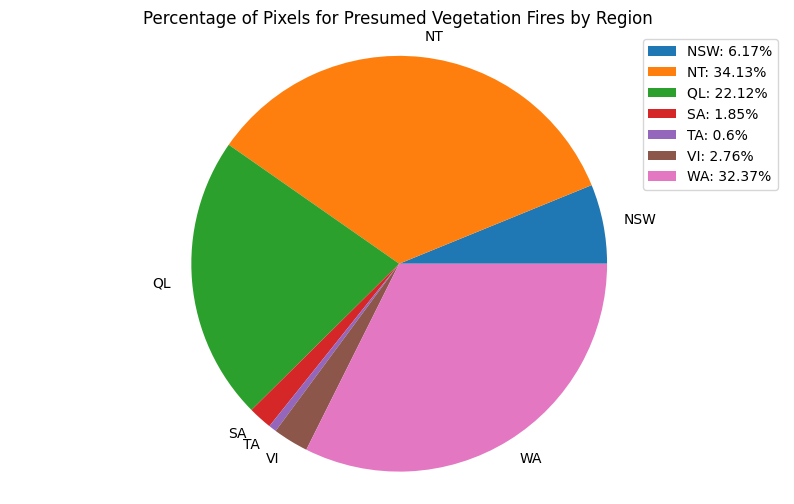

In [16]:
# Creating a pie chart to visualize the portion of count of pixels for presumed vegetation fires across regions
plt.figure(figsize=(10, 6))
# Grouping the data by region and summing the counts
region_counts = df.groupby('Region')['Count'].sum()
# Creating the pie chart using plt.pie function
# Labels are set to the region names, and autopct is used to display percentage
plt.pie(region_counts, labels=region_counts.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([f"{i}: {round(k/region_counts.sum()*100,2)}%" for i,k in zip(region_counts.index, region_counts)])
plt.axis('equal')
plt.show()


---


### TASK 1.5: Let's try to develop a histogram of the mean estimated fire brightness<br> Using Matplotlib to create the histogram


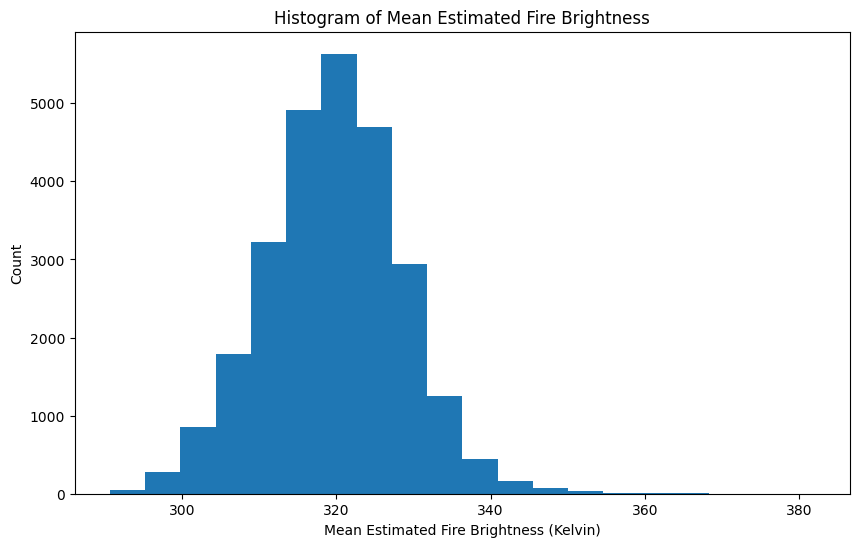

In [17]:
# Creating a histogram to visualize the distribution of mean estimated fire brightness
plt.figure(figsize=(10, 6))
# Using plt.hist to create the histogram
# Setting the number of bins to 20 for better visualization
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

### TASK 1.6: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and  pass region as hue


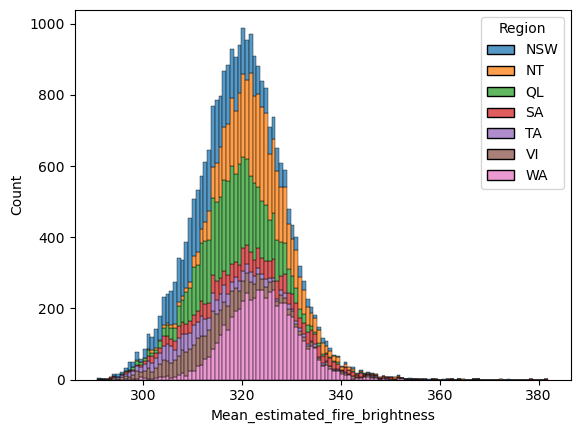

In [23]:
# Creating a stacked histogram to visualize the distribution of mean estimated fire brightness across regions using Seaborn
# Using sns.histplot to create the stacked histogram
# Specifying the DataFrame (data=df) and the column for the x-axis (x='Mean_estimated_fire_brightness')
# Adding hue='Region' to differentiate the distribution across regions
# Setting multiple='stack' to stack the histograms for different regions
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

---


### TASK 1.7: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?


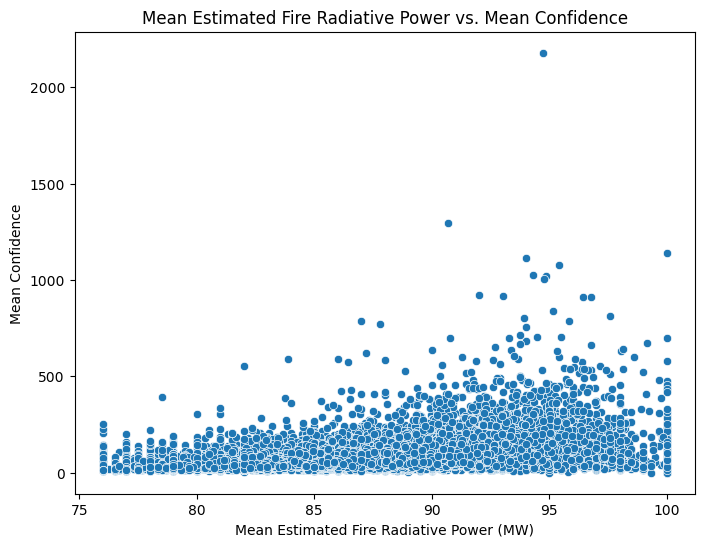

In [20]:
 # Creating a scatter plot to visualize the relationship between mean estimated fire radiative power and mean  confidence using Seaborn
plt.figure(figsize=(8, 6))
# Using sns.scatterplot to create the scatter plot
# Specifying the DataFrame (data=df) and the columns for the x-axis (x='Mean_confidence') and y-axis            (y='Mean_estimated_fire_radiative_power')
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

---


### TASK 1.8: Let's mark these seven regions on the Map of Australia using Folium
<br>  <br> For australia use [-25, 135] as location to create the map


In [21]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [22]:
# instantiate a feature group 
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)

---


# Fire Area and Brightness Analysis in Australia: Summary
This analysis explores various aspects of fire data across different regions in Australia. It provides insights into the fire area, fire brightness, and other related metrics using visualizations to convey key findings. The dataset used contains information about fire areas, fire brightness, radiative power, confidence levels, and more, for regions in Australia from 2005 to 2013. Below is a detailed summary of the analysis conducted.

## Key Tasks and Findings
## TASK 1.1: Average Estimated Fire Area Over Time

Objective: To understand how the average estimated fire area changes over the years.

Method: The dataset was grouped by year and the mean estimated fire area for each year was calculated.

Key Findings: The estimated fire area showed a notable increase between 2010 and 2012, reaching a peak of approximately 265 km² around that time.

This peak period aligns with the peak of wildfires in Australia between 2011 and 2012, corroborating the real-world impact of wildfires during that time.

## TASK 1.2: Average Estimated Fire Area by Year and Month

Objective: To gain deeper insight into the fire area by analyzing the data on a monthly basis.

Method: The dataset was grouped by both year and month, and the average estimated fire area was plotted.

Key Findings: The peak of fire activity was observed between 2011, April, and 2012, aligning with historical data that indicates this period experienced some of the largest fires in Australia.

## TASK 1.3: Distribution of Mean Estimated Fire Brightness Across Regions

Objective: To understand how fire brightness varies across the different regions in Australia.

Method: A bar plot was created using Seaborn to display the mean estimated fire brightness across regions.

Key Findings: The regions with the highest mean estimated fire brightness were NSW (New South Wales) and NT (Northern Territory), followed by other regions like QL (Queensland) and WA (Western Australia).
This analysis provides a spatial understanding of where fires were most intense in terms of brightness.


## TASK 1.4: Proportion of Pixel Count for Presumed Vegetation Fires by Region

Objective: To visualize how the count of presumed vegetation fires varies across regions.

Method: A pie chart was created to visualize the proportion of presumed vegetation fires across different regions.

Key Findings: NT (Northern Territory) had the highest proportion of 34.13%, followed closely by WA (Western Australia) at 32.37%.

The region with the smallest portion was TA (Tasmania), with only 0.6%, and SA (South Australia) had the second smallest at 1.85%.

## TASK 1.5: Histogram of Mean Estimated Fire Brightness

Objective: To visualize the distribution of fire brightness.

Method: A histogram was generated to show the frequency distribution of mean estimated fire brightness across all regions.

Key Findings: The histogram revealed that the majority of fire brightness values were concentrated around 5000, with the highest count being 320 for a particular bin.

This indicates that fire brightness was generally consistent but had some spikes in certain periods.

## TASK 1.6: Distribution of Estimated Fire Brightness Across Regions

Objective: To compare how fire brightness is distributed across different regions.

Method: A stacked histogram was created using Seaborn, with fire brightness on the x-axis and regions differentiated using hues.

Key Findings: NSW (New South Wales) had the highest number of occurrences of extreme fire brightness values, followed by NT (Northern Territory) and QL (Queensland).

The regions of SA, TA, VI, and WA had fewer instances of high fire brightness, which may be indicative of less intense fires in those areas.

## TASK 1.7: Correlation Between Mean Estimated Fire Radiative Power and Mean Confidence

Objective: To explore whether there is a correlation between fire radiative power and the confidence level of the estimates.

Method: A scatter plot was used to visualize the relationship between mean estimated fire radiative power and mean confidence.

Key Findings:

There appears to be no clear linear correlation between fire radiative power and confidence levels, suggesting that while fire radiative power is a strong indicator of fire intensity, the confidence level does not consistently predict the radiative power.

## TASK 1.8: Visualization of Regions on the Map of Australia Using Folium

Objective: To mark the seven regions on the map of Australia to provide a geographical context.

Method: Folium was used to create an interactive map of Australia. The seven regions were marked with red circle markers based on their latitude and longitude coordinates.

Key Findings: The map provides a clear visual representation of the geographical locations of the seven regions (NSW, QL, SA, TA, VI, WA, NT).

This task adds an extra layer of understanding by showing where the data is sourced from on the Australian map.

## Conclusion

This analysis provides a comprehensive understanding of fire data across various regions of Australia. By exploring different aspects such as the estimated fire area, brightness, radiative power, and confidence levels, as well as visualizing this information in various formats such as plots, histograms, and maps, we can conclude that:

The period between 2010 and 2012 saw the most intense fires, especially around 2011-2012, which were likely due to climatic and environmental factors.
The regions of NSW and NT have experienced the most significant fires in terms of brightness and pixel counts.
There is no significant correlation between the radiative power of fires and the confidence levels in the estimates.
This analysis is crucial for understanding fire patterns and can assist in predicting future fire risks, improving response strategies, and guiding fire management policies in Australia.

This analysis is written by Qazi Fabia Hoq

## Authors


[Dr. Pooja](author_link)


#### Copyright © 2023 IBM Corporation. All rights reserved.
```{toggle}## Change Log
```


## Completed by:
Qazi Fabia Hoq (as part of the Data Science Professional Certification by IBM)